<a href="https://colab.research.google.com/github/clmra93/dio-ifood-dev-week/blob/main/projetobootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import gdown
import pandas as pd

file_id = '121fqtN96Mm8-rkq1MsRwHQyoGx5NhP4R'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

dados = pd.read_csv('/content/feedbacks.csv', delimiter=';')

Downloading...
From: https://drive.google.com/uc?id=121fqtN96Mm8-rkq1MsRwHQyoGx5NhP4R
To: /content/feedbacks.csv
100%|██████████| 235/235 [00:00<00:00, 534kB/s]


In [ ]:
import pandas as pd

notas = dados['nota']

detratores = 0
promotores = 0

for nota in notas:
  if nota >= 9:
    promotores =+ 1
  elif nota <= 6:
    detratores =+ 1

nps = (promotores - detratores) / len(notas) *100
print(nps)

10.0


In [ ]:
import pandas as pd

def calcular_nps(notas):
  detratores = 0
  promotores = 0

  for nota in notas:
    if nota >= 9:
      promotores =+ 1
    elif nota <= 6:
      detratores =+ 1

  return (promotores - detratores) / len(notas) *100

notas = dados['nota']

print(nps)

10.0


In [ ]:
import pandas as pd

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = sum(1 for feedback in self.feedbacks if feedback.nota <= 6)
    promotores = sum(1 for feedback in self.feedbacks if feedback.nota >= 9)

    return (promotores - detratores) / len(notas) *100

feedbacks = [Feedback(linha['nota'], linha['comentario'])  for i, linha in dados.iterrows()]

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()
notas = dados['nota']

print(nps)

70.0


In [ ]:
import pandas as pd

def calcular_nps(notas):
  detratores = sum(notas.apply(lambda nota: nota <= 6))
  promotores = sum(notas.apply(lambda nota: nota >= 9))

  return (promotores - detratores) / len(notas) *100

notas = dados['nota']

print(nps)

70.0


In [ ]:
import pandas as pd

def calcular_nps(notas):
  detratores = notas[nota <= 6].count()
  promotores = notas[nota >= 9].count()

  return (promotores - detratores) / len(notas) *100

notas = dados['nota']

print(nps)

70.0


In [ ]:
import pandas as pd

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario = comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    detratores = sum(1 for feedback in self.feedbacks if feedback.nota <= 6)
    promotores = sum(1 for feedback in self.feedbacks if feedback.nota >= 9)

    return (promotores - detratores) / len(notas) *100

feedbacks = dados.apply(lambda linha: Feedback(linha['nota'], linha['comentario']), axis=1)

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()
notas = dados['nota']

print(nps)

70.0


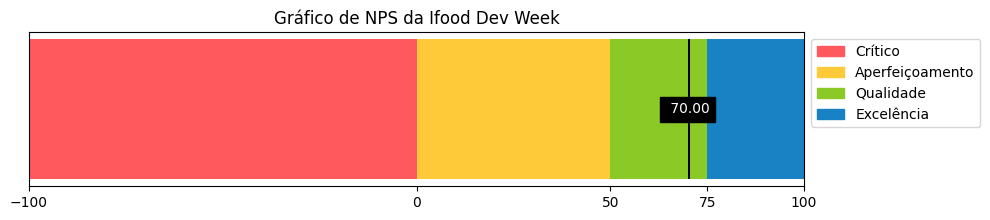

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

NPS_ZONAS =   ['Crítico', 'Aperfeiçoamento', 'Qualidade', 'Excelência']
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES =   ['#FF595E', '#FFCA3A', '#8AC926', '#1982C4']

def criar_grafico_nps(nps):
  fig, ax = plt.subplots(figsize=(10, 2))

  for i, zona in enumerate (NPS_ZONAS):
    ax.barh([0], width=NPS_VALORES[i+1] - NPS_VALORES[i], left=NPS_VALORES [i], color=NPS_CORES [i])

  ax.barh([0], width=.5, left=nps, color='black')
  ax.set_yticks([])
  ax.set_xlim(-100,100)
  ax.set_xticks(NPS_VALORES)

  plt.text(nps, 0, f'{nps: .2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  plt.title('Gráfico de NPS da Ifood Dev Week')

  plt.show()

criar_grafico_nps(nps)

In [ ]:
import openai

openai.api_key = openai_api_key

def analisar_sentimentos(feedbacks):

  comentarios_formatados = "\n".join([f"- Nota {feedback.nota}! {feedback.comentario}" for feedback in feedbacks])

  prompt = f"""
            Sintetize uma análise geral sobre os seguintes comentário:
            {comentarios_formatados}
            """

  respostaAPI = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[
      {
          "role": "system",
          "content": "Você é um modelo de análise de sentimentos com foco em feedbacks sobre experiências educacionais."
      },
      {
          "role": "user",
          "content": prompt
      }
    ]
  )
  return respostaAPI.choices[0].message.content

insigths = analisar_sentimentos(feedbacks)
print(insigths)